<a href="https://colab.research.google.com/github/viktoruebelhart/Keras_NPL_News/blob/main/Keras_NPL_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##News Portal.

This portal wants to build a solution that automates the classification of news into different categories.

The different categories we want to evaluate this data are: world, sports, business and science and technology.

In [1]:
url ='https://github.com/allanspadini/curso-tensorflow-proxima-palavra/raw/main/dados/train.zip'

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(url, header=None,names=['ClassIndex', 'Title', 'Description'])

In [4]:
df.head()

,ClassIndex,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ClassIndex   120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [6]:
df['Text'] = df['Title'] + ' ' + ['Description']

In [7]:
df['Text']

0         Wall St. Bears Claw Back Into the Black (Reute...
1         Carlyle Looks Toward Commercial Aerospace (Reu...
2         Oil and Economy Cloud Stocks' Outlook (Reuters...
3         Iraq Halts Oil Exports from Main Southern Pipe...
4         Oil prices soar to all-time record, posing new...
                                ...                        
119995    Pakistan's Musharraf Says Won't Quit as Army C...
119996        Renteria signing a top-shelf deal Description
119997          Saban not going to Dolphins yet Description
119998                        Today's NFL games Description
119999             Nets get Carter from Raptors Description
Name: Text, Length: 120000, dtype: object

In [8]:
df.head()

,ClassIndex,Title,Description,Text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


In [9]:
df['ClassIndex'].unique()

array([3, 4, 2, 1])

In [10]:
df['ClassIndex'].value_counts()

ClassIndex
3    30000
4    30000
2    30000
1    30000
Name: count, dtype: int64

We will pass the data to TensorFlow in numerical form, but we need to ensure that this data starts from the value 0

In [11]:
df['ClassIndex'] = df['ClassIndex'] - 1 

In [12]:
df['ClassIndex'].unique()

array([2, 3, 1, 0])

We will need to split the data into one part to train the Deep Learning model and another to validate it.

To separate them, we will use the SK Learn library

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
  x_train, x_test, y_train, y_test = train_test_split(df['Text'].values, df['ClassIndex'].values, test_size=0.20, random_state=4256)

We need to transform our texts into numbers. This is because, up until now, we have performed the general overview process and divided our data into training and testing. In addition, we have stored them in the variables X and Y, our input and the expected output of the neural network.

However, in the variable X, we have the data in text. Therefore, we need to convert this data to the numerical format, which is the format that the neural network understands to process.

In [15]:
import tensorflow as tf

2024-10-14 22:13:51.047651: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-14 22:13:51.172839: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-14 22:13:51.218793: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-14 22:13:51.232100: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-14 22:13:51.338186: I tensorflow/core/platform/cpu_feature_guar

In [16]:
vocab_size = 1000

In [17]:
encoder = tf.keras.layers.TextVectorization(max_tokens=vocab_size)

In [18]:
encoder.adapt(x_train)

In [19]:
encoder_vocab = encoder.get_vocabulary()
encoder_vocab[:20]

['',
 '[UNK]',
 'description',
 'to',
 'in',
 'for',
 'on',
 'of',
 'ap',
 'the',
 '39s',
 'us',
 'a',
 'at',
 'reuters',
 'with',
 'new',
 'as',
 '39',
 'up']

In [20]:
example = "Today's NFL games PITTSBURG at NY GIANTS"

In [21]:
encoder(example)

<tf.Tensor: shape=(7,), dtype=int64, numpy=array([  1, 402, 251,   1,  13,   1, 303])>

Now, we will build the neural network that will perform this classification process.

In [22]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=16,
        mask_zero=True
    ),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [24]:
x_test[1]

"Palestinians Pour Out Grief Over Arafat's Death Description"

In [25]:
model.predict(x_test[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


array([[0.24972457, 0.25161287, 0.24874371, 0.24991888]], dtype=float32)

As a prediction, we obtain a vector with 4 values. These values ​​represent the probability of each class being the same. To get a specific value, in addition to predict, we have to get the highest value.

In [26]:
model.predict(x_test[:1]).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([1])

In [27]:
y_test[1]

0

The y_test is 0. This happens because we have a very close probability for each of the classes, since our neural network was started with random weights.

So, we need to teach the neural network to deal with our problem.

Training the Model

In [22]:
epochs = 10

In [31]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3767 - loss: 1.3622 - val_accuracy: 0.6121 - val_loss: 1.1831
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6395 - loss: 1.0986 - val_accuracy: 0.6870 - val_loss: 0.9078
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6993 - loss: 0.8717 - val_accuracy: 0.7172 - val_loss: 0.7922
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7213 - loss: 0.7710 - val_accuracy: 0.7284 - val_loss: 0.7416
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7304 - loss: 0.7301 - val_accuracy: 0.7360 - val_loss: 0.7161
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7394 - loss: 0.7017 - val_accuracy: 0.7388 - val_loss: 0.7014
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7422 - loss: 0.6875 - val_accuracy: 0.7420 - val_loss: 0.6894
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7425 - loss: 0.6827 - val_accurac

In [23]:
import matplotlib.pyplot as plt

In [24]:
def plot_results(history, epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')

    plt.show()

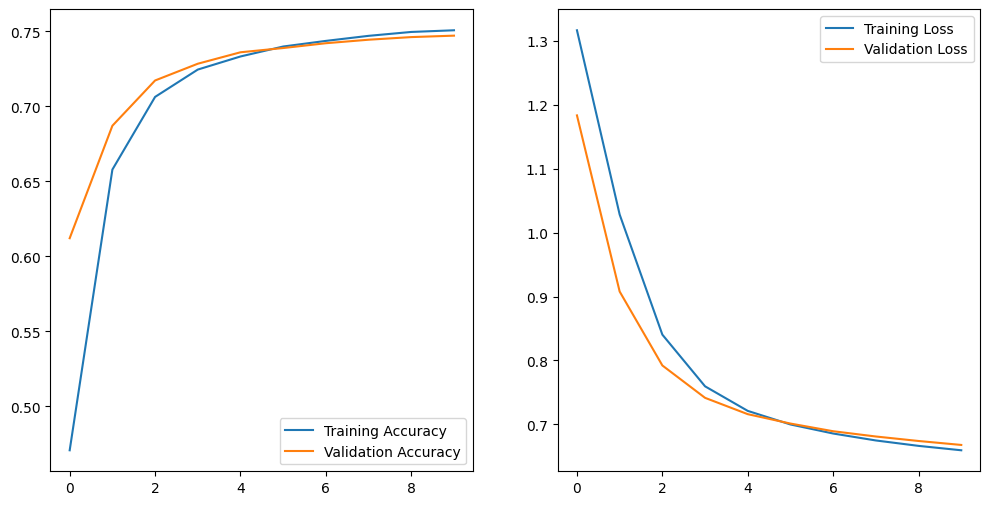

In [33]:
plot_results(history,epochs)

From these graphs, we can visualize the evolution of the model's accuracy during training. We can see that the model behaves well, achieving similar accuracy rates for training and testing data, which is great.

But, this training result can be improved

To do this, we can add other layers to the neural network that make sense so that it can better perform the classification task.

One of the possible types of layers are convolutional layers.

In [26]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=16,
        mask_zero=True
    ),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Conv1D(128, kernel_size=4, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [29]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
  46/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2809 - loss: 1.3846

 455/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2893 - loss: 1.3819

2024-10-14 22:14:58.139327: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Incompatible shapes: [1,1,128] vs. [32,3,64]
	 [[{{function_node __inference_one_step_on_data_2378}}{{node sequential_1_1/conv1d_3_1/add}}]]


InvalidArgumentError: Graph execution error:

Detected at node sequential_1_1/conv1d_3_1/add defined at (most recent call last):
  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 737, in start

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in process_one

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 758, in execute_request

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 426, in do_execute

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3046, in run_cell

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3101, in _run_cell

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3306, in run_cell_async

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3488, in run_ast_nodes

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code

  File "/tmp/ipykernel_1310/650144676.py", line 1, in <module>

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 51, in train_step

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/layer.py", line 899, in __call__

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/models/sequential.py", line 213, in call

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/models/functional.py", line 182, in call

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/models/functional.py", line 584, in call

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/layer.py", line 899, in __call__

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/convolutional/conv1d.py", line 166, in call

Incompatible shapes: [1,1,128] vs. [32,3,64]
	 [[{{node sequential_1_1/conv1d_3_1/add}}]] [Op:__inference_one_step_on_iterator_2459]